In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("output/data/train_data_log.csv", usecols=range(2,10,1))
df.head()

,agent-0_action,agent-0_reward,agent-1_action,agent-1_reward,agent-2_action,agent-2_reward,agent-3_action,agent-3_reward
0,8.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
1,7.0,-1.0,8.0,0.0,4.0,0.0,5.0,0.0
2,6.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0
3,6.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0
4,3.0,0.0,8.0,0.0,3.0,0.0,2.0,0.0


In [18]:
ep_tag = np.zeros(df.shape[0]).astype(np.int32)
ep = 1
for i in range(1000,len(ep_tag)+1,1000):
    ep_tag[i-1000:i] = ep
    ep += 1
df["episode"] = ep_tag
df.head()

,agent-0_action,agent-0_reward,agent-1_action,agent-1_reward,agent-2_action,agent-2_reward,agent-3_action,agent-3_reward,episode
0,8.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,1
1,7.0,-1.0,8.0,0.0,4.0,0.0,5.0,0.0,1
2,6.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,1
3,6.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0,1
4,3.0,0.0,8.0,0.0,3.0,0.0,2.0,0.0,1


In [41]:
rewards = []
for g in df.groupby("episode").groups:
    a0 = df.groupby("episode").get_group(g)["agent-0_reward"].sum()
    a1 = df.groupby("episode").get_group(g)["agent-1_reward"].sum()
    a2 = df.groupby("episode").get_group(g)["agent-2_reward"].sum()
    rewards.append([a0,a1,a2])

rewards = np.array(rewards)

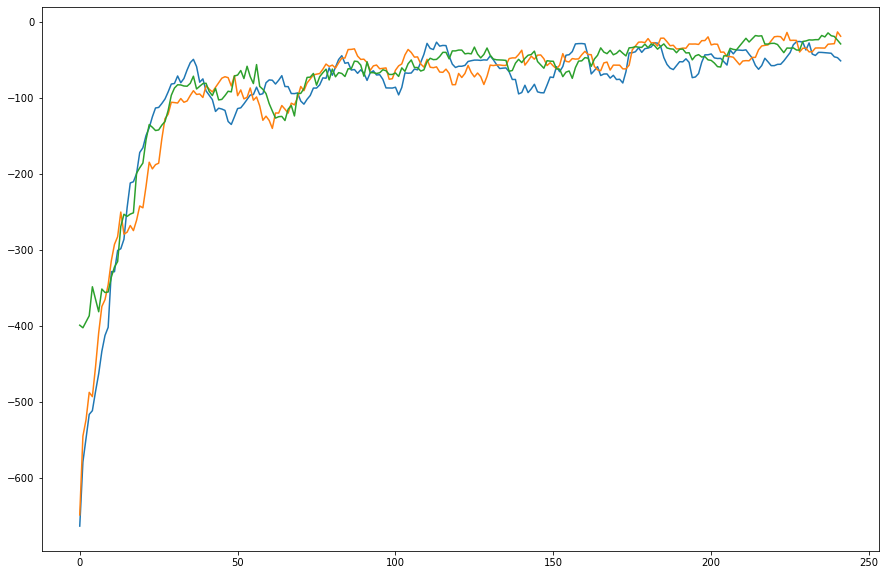

In [54]:
import matplotlib.pyplot as plt

smooth_R = [np.sum(rewards[i-12:i,:], axis=0)/10 for i in range(12,len(rewards),1)]
plt.figure(figsize=(15,10))
plt.plot(smooth_R)